## Setup

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
#Importing dataset
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking datatypes
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## EDA

### Pairplot

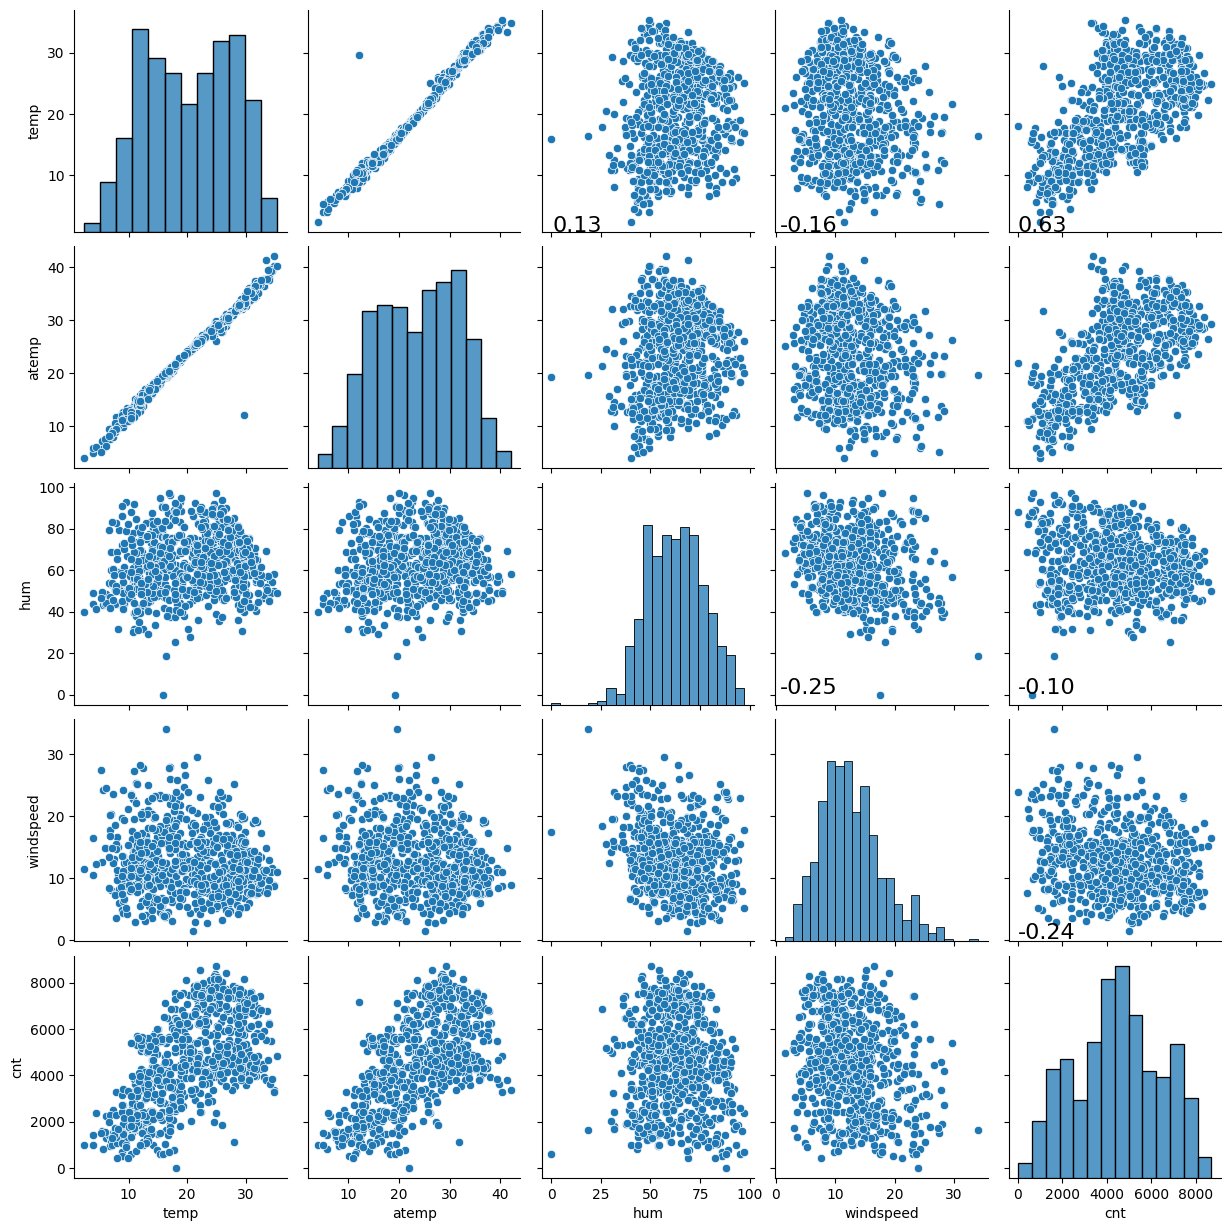

In [5]:
# Identifying continuous columns to do a pairplot for
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create a pairplot
g = sns.pairplot(df[numeric_cols])

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Add correlation coefficient annotations to the pairplot
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        # Get the axes of the pairplot grid
        ax = g.axes[i, j]
        # Get the correlation coefficient for the pair of variables
        corr_val = corr_matrix.iloc[i, j]
        # Format the correlation coefficient and add it to the plot with adjusted text position
        ax.annotate(f'{corr_val:.2f}', 
                    xy=(0.067078+0.186844*j, 0.806994-0.189204*i),
                    fontsize=16, color='black')

# Show the plot
plt.show()

### Univariate Analysis

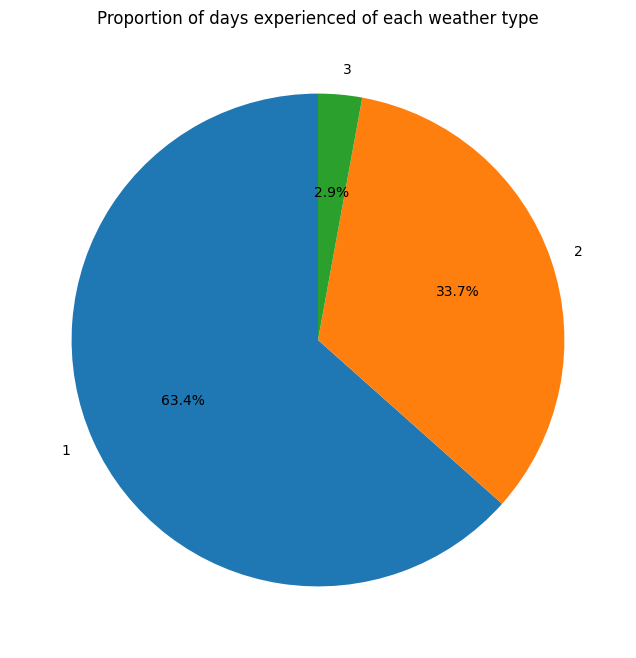

In [6]:
# Pie Chart for weathersit
weathersit_counts = df['weathersit'].value_counts()

plt.figure(figsize=(8, 8))
weathersit_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of days experienced of each weather type')
plt.ylabel('')  # Hides the y-label
plt.show()

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

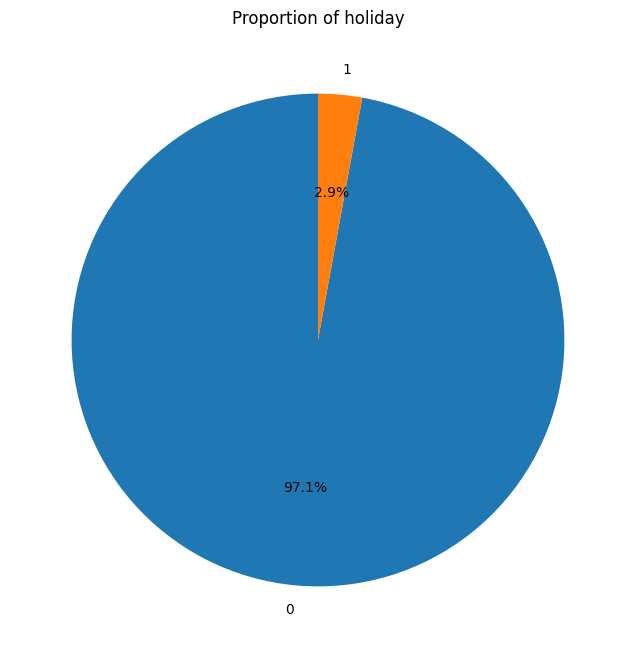

In [7]:
# Pie Chart for holiday
holiday_counts = df['holiday'].value_counts()

plt.figure(figsize=(8, 8))
holiday_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of holiday')
plt.ylabel('')  # Hides the y-label
plt.show()

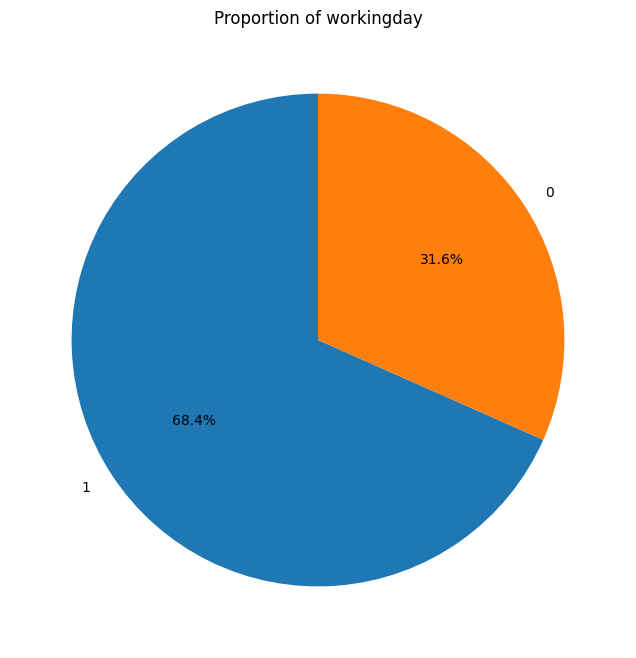

In [8]:
# Pie Chart for workingday
workingday_counts = df['workingday'].value_counts()

plt.figure(figsize=(8, 8))
workingday_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of workingday')
plt.ylabel('')  # Hides the y-label
plt.show()

### Bivariate Analysis

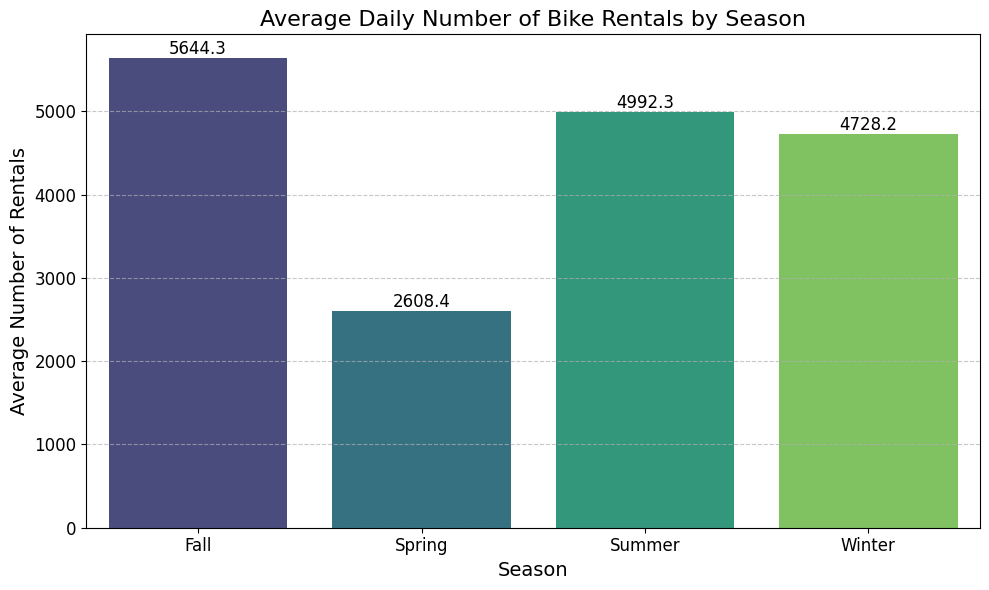

In [9]:
# Mapping season numbers to names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_mapping)

# Calculate average bike rentals by season
avg_rentals = df.groupby('season')['cnt'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='season', y='cnt', data=avg_rentals, palette='viridis')

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Beautification
plt.title('Average Daily Number of Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

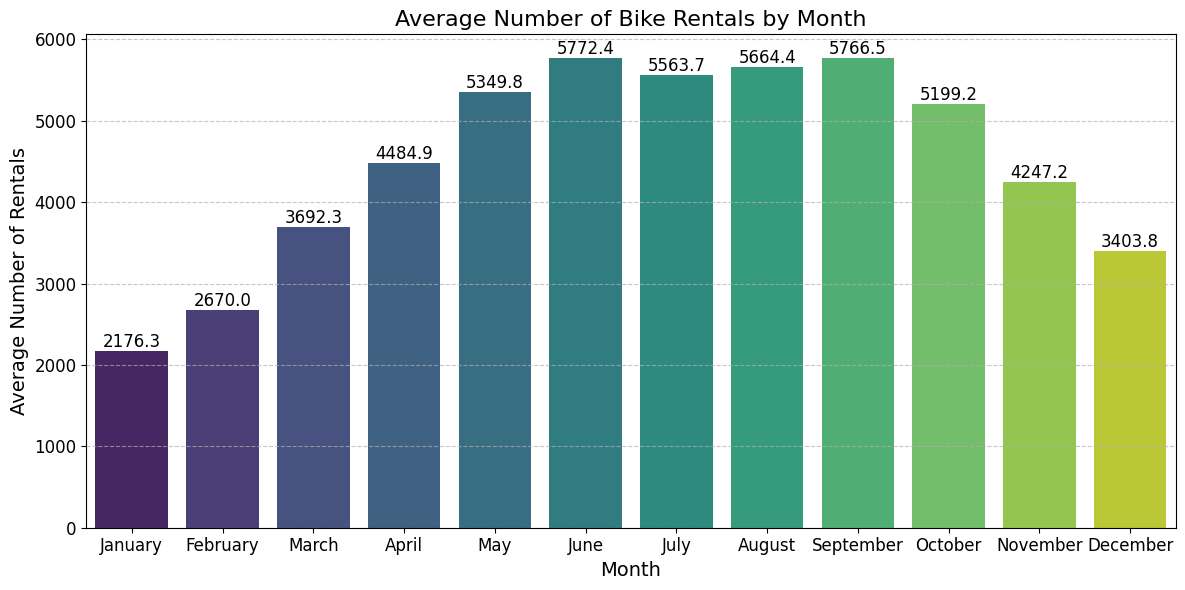

In [10]:
# Mapping month numbers to names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map the month numbers to names and set the order
df['mnth'] = df['mnth'].map(month_mapping)
df['mnth'] = pd.Categorical(df['mnth'], categories=list(month_mapping.values()), ordered=True)

# Calculate average bike rentals by month
avg_rentals = df.groupby('mnth')['cnt'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='mnth', y='cnt', data=avg_rentals, palette='viridis')

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Beautification
plt.title('Average Number of Bike Rentals by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

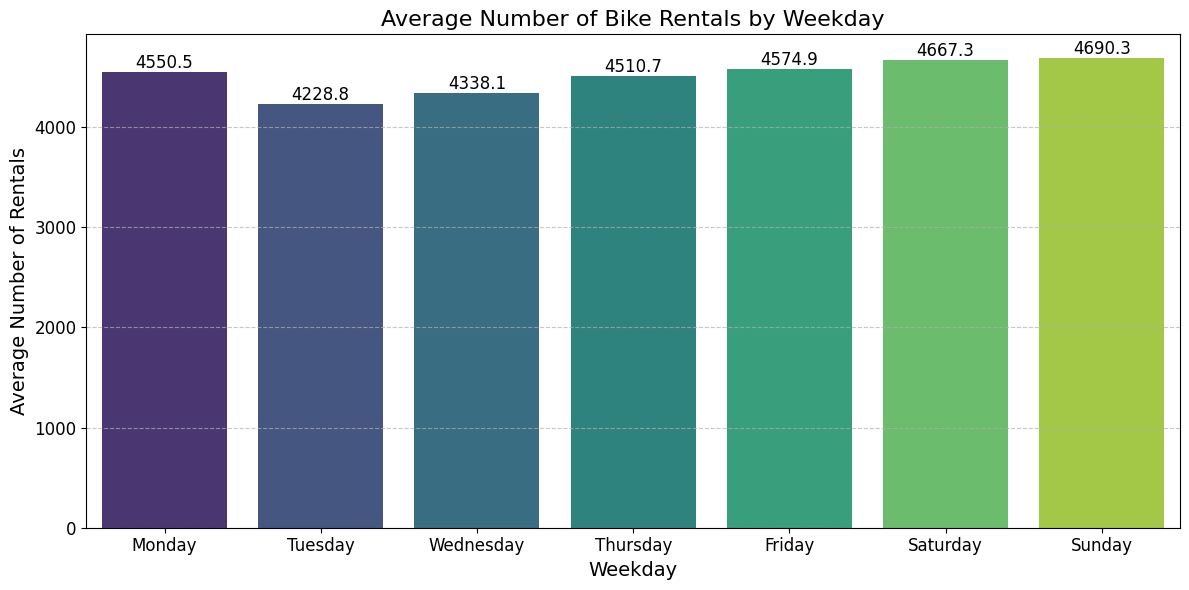

In [11]:
# Mapping weekday numbers to names, with Monday first
weekday_mapping = {
    0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday',
    4: 'Saturday', 5: 'Sunday', 6: 'Monday'
}

# Map the weekday numbers to names
df['weekday'] = df['weekday'].map(weekday_mapping)

# Set the order of the weekdays, starting with Monday
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_weekdays, ordered=True)

# Calculate average bike rentals by weekday
avg_rentals = df.groupby('weekday')['cnt'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='weekday', y='cnt', data=avg_rentals, palette='viridis')

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Beautification
plt.title('Average Number of Bike Rentals by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Average Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

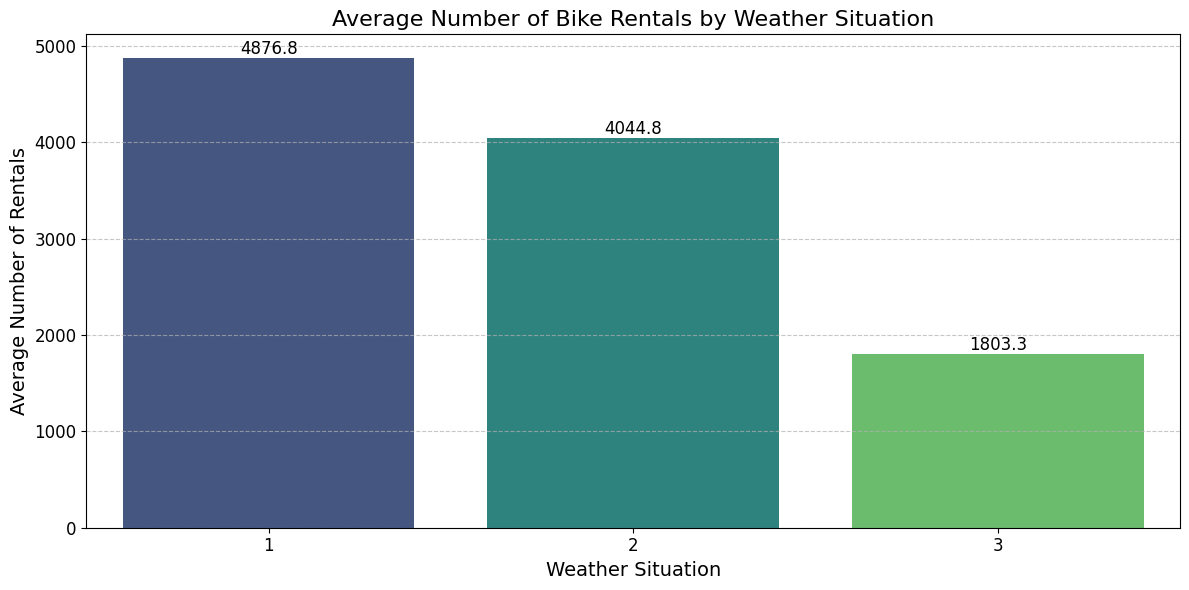

In [12]:
# Calculate average bike rentals by weather situation
avg_rentals = df.groupby('weathersit')['cnt'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='weathersit', y='cnt', data=avg_rentals, palette='viridis')

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Beautification
plt.title('Average Number of Bike Rentals by Weather Situation', fontsize=16)
plt.xlabel('Weather Situation', fontsize=14)
plt.ylabel('Average Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)  # Set x-axis ticks and labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

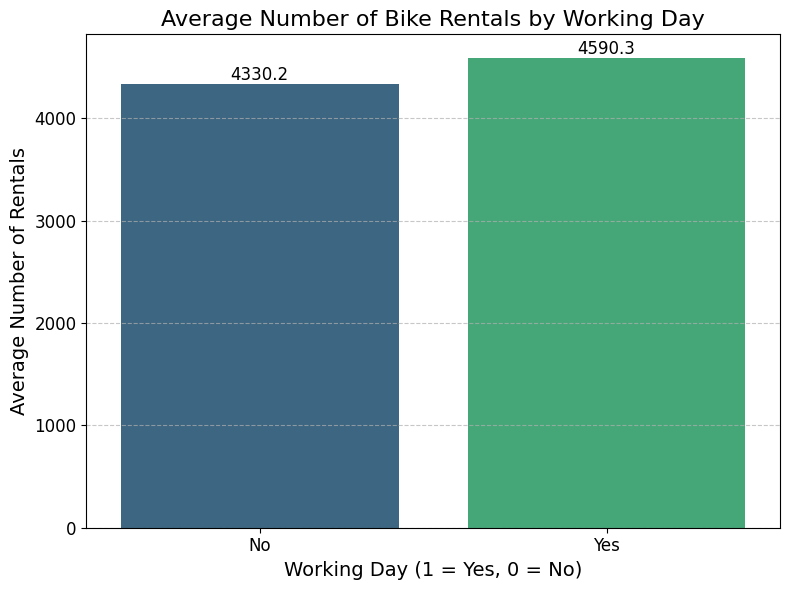

In [13]:
# Calculate average bike rentals by working day
avg_rentals = df.groupby('workingday')['cnt'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='workingday', y='cnt', data=avg_rentals, palette='viridis')

# Add data labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Beautification
plt.title('Average Number of Bike Rentals by Working Day', fontsize=16)
plt.xlabel('Working Day (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Average Number of Rentals', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=12)  # Set x-axis ticks and labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

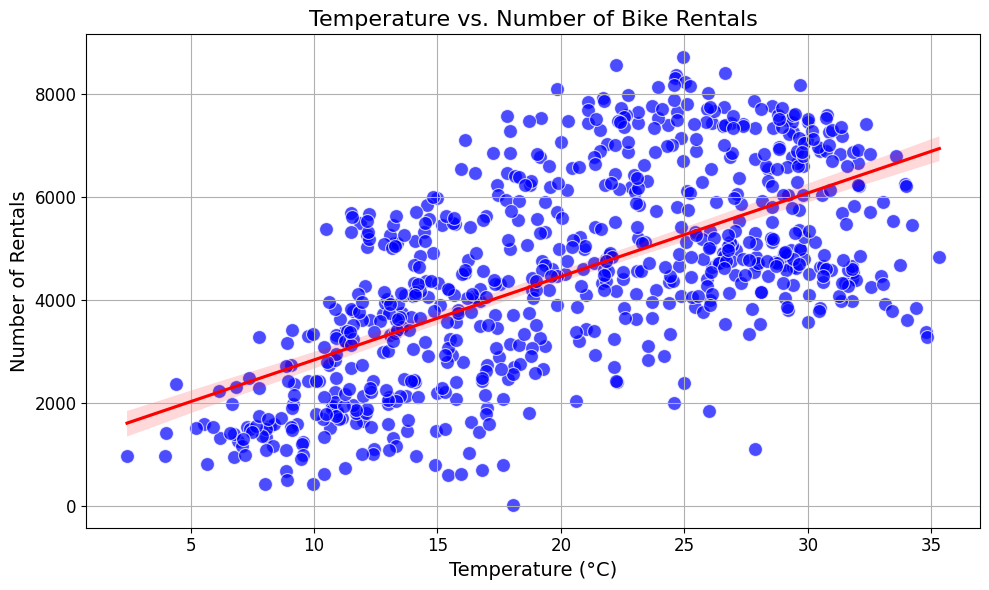

In [14]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='blue', s=100, alpha=0.7)

# Add a regression line
sns.regplot(x='temp', y='cnt', data=df, scatter=False, color='red')

# Beautification
plt.title('Temperature vs. Number of Bike Rentals', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

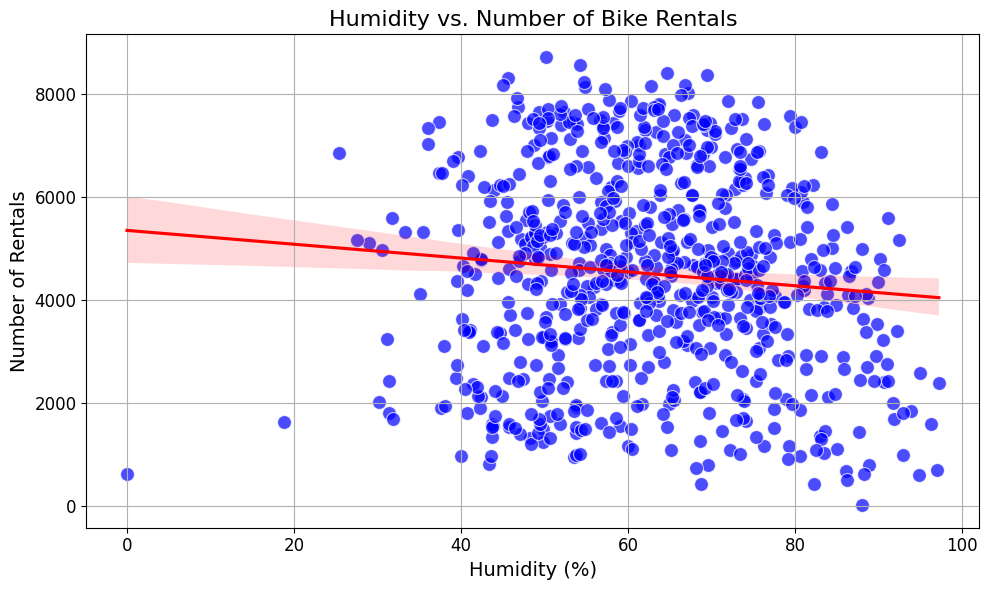

In [15]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df, color='blue', s=100, alpha=0.7)

# Add a regression line
sns.regplot(x='hum', y='cnt', data=df, scatter=False, color='red')

# Beautification
plt.title('Humidity vs. Number of Bike Rentals', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

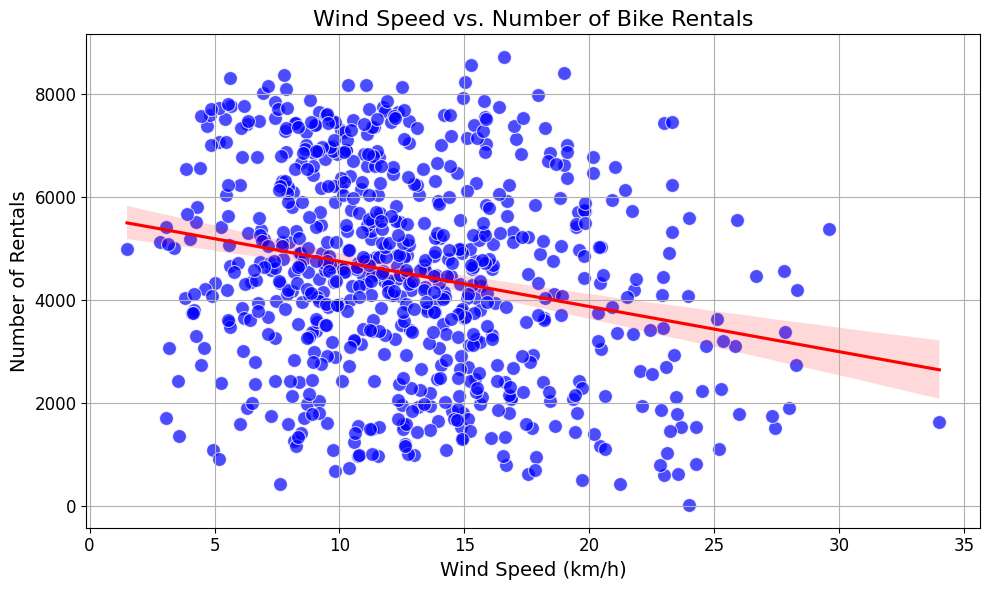

In [16]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, color='blue', s=100, alpha=0.7)

# Add a regression line
sns.regplot(x='windspeed', y='cnt', data=df, scatter=False, color='red')

# Beautification
plt.title('Wind Speed vs. Number of Bike Rentals', fontsize=16)
plt.xlabel('Wind Speed (km/h)', fontsize=14)
plt.ylabel('Number of Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

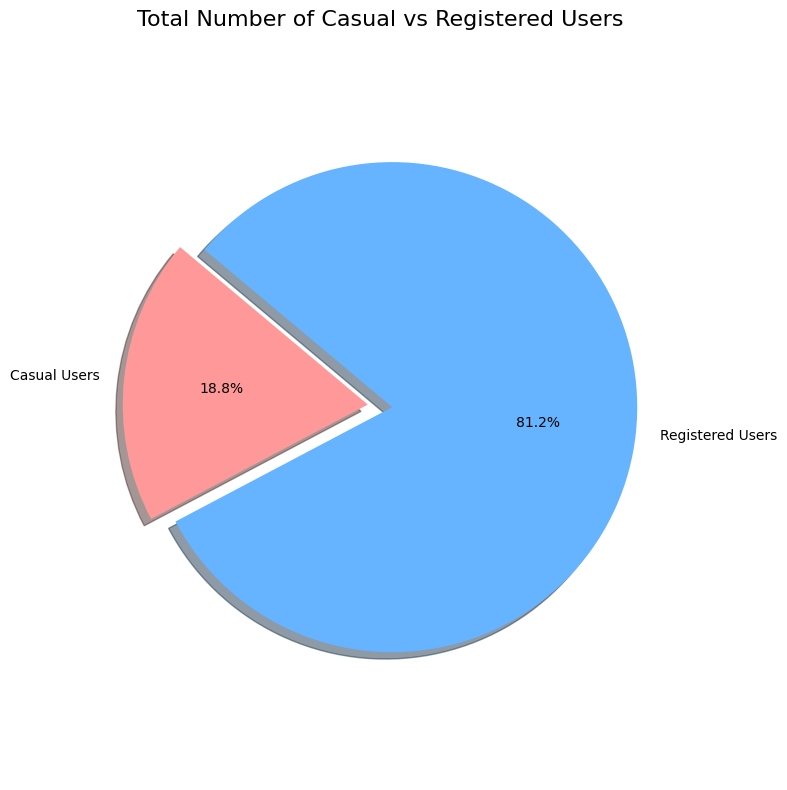

In [17]:
# Calculate total casual and registered users
total_casual = df['casual'].sum()
total_registered = df['registered'].sum()

# Data for the pie chart
labels = ['Casual Users', 'Registered Users']
sizes = [total_casual, total_registered]
colors = ['#ff9999', '#66b3ff']  # Custom colors for the pie chart
explode = (0.1, 0)  # explode the 1st slice (Casual Users)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Beautification
plt.title('Total Number of Casual vs Registered Users', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

## Data Pre-processing

In [18]:
df=pd.get_dummies(df, columns=['season'], prefix='season', drop_first=True)

In [19]:
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter
0,1,01-01-2018,0,January,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,January,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [20]:
df=pd.get_dummies(df, columns=['mnth'], prefix='mnth', drop_first=True)

In [21]:
df=pd.get_dummies(df, columns=['weekday'], prefix='weekday', drop_first=True)

In [22]:
df=pd.get_dummies(df, columns=['weathersit'], prefix='weathersit', drop_first=True)

In [23]:
df=df.drop(['casual','registered'],axis=1)

In [24]:
df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_February', 'mnth_March', 'mnth_April',
       'mnth_May', 'mnth_June', 'mnth_July', 'mnth_August', 'mnth_September',
       'mnth_October', 'mnth_November', 'mnth_December', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [25]:
df=df.drop(['instant', 'dteday'],axis=1)

## Splitting data

In [26]:
# Define features (X) and target (y)
x=df.drop(['cnt'],axis=1)
y=df['cnt']

In [27]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (584, 29)
x_test shape: (146, 29)
y_train shape: (584,)
y_test shape: (146,)


## Scaling

In [28]:
# Identifying continuous columns to scale
continuous_cols = ['temp', 'atemp', 'hum', 'windspeed']

# Scaling the continuous variables
scaler = StandardScaler()
x_train[continuous_cols] = scaler.fit_transform(x_train[continuous_cols])
x_test[continuous_cols] = scaler.transform(x_test[continuous_cols])

## Feature Selection

In [29]:
# Define a function to calculate VIF
def calculate_vif(x):
    vif = pd.DataFrame()
    vif['variable'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [30]:
# Calculate initial VIF
x_train_scaled = x_train.copy()  # Assuming you have scaled your x_train
x_test_scaled = x_test.copy()    # Assuming you have scaled your x_test
vif_df = calculate_vif(x_train_scaled)

# Iteratively remove features with VIF >= 5
while vif_df['VIF'].max() >= 5:
    # Find the feature with the highest VIF
    max_vif_feature = vif_df.loc[vif_df['VIF'].idxmax(), 'variable']
    
    # Print the feature being removed
    print(f"Removing {max_vif_feature} with VIF {vif_df['VIF'].max()}")
    
    # Drop the feature with the highest VIF
    x_train_scaled.drop(columns=[max_vif_feature], inplace=True)
    x_test_scaled.drop(columns=[max_vif_feature], inplace=True)
    
    # Recalculate VIF
    vif_df = calculate_vif(x_train_scaled)

# Print the final VIF DataFrame
print("Final VIF values:")
print(vif_df)

c:\Users\rajee\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing holiday with VIF inf
Removing temp with VIF 213.2945091796494
Removing workingday with VIF 24.016383762164576
Removing season_Winter with VIF 9.492816474598428
Removing season_Summer with VIF 8.386681995859211
Removing atemp with VIF 5.2959110555277515
Final VIF values:
             variable       VIF
0                  yr  2.068882
1                 hum  1.950470
2           windspeed  1.213835
3       season_Spring  2.716802
4       mnth_February  1.637472
5          mnth_March  1.404676
6          mnth_April  1.579772
7            mnth_May  1.598832
8           mnth_June  1.559499
9           mnth_July  1.633998
10        mnth_August  1.531756
11     mnth_September  1.617482
12       mnth_October  1.663628
13      mnth_November  1.553963
14      mnth_December  1.412236
15    weekday_Tuesday  1.917723
16  weekday_Wednesday  1.910565
17   weekday_Thursday  1.842301
18     weekday_Friday  1.865804
19   weekday_Saturday  1.879586
20     weekday_Sunday  1.802978
21       weather

## Model Building

In [31]:
# Fit the linear regression model using the selected features
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [32]:
# Predicted values on training data
y_train_pred = model.predict(x_train_scaled)

# Residuals on training data
residuals = y_train - y_train_pred

## Checking Assumptions

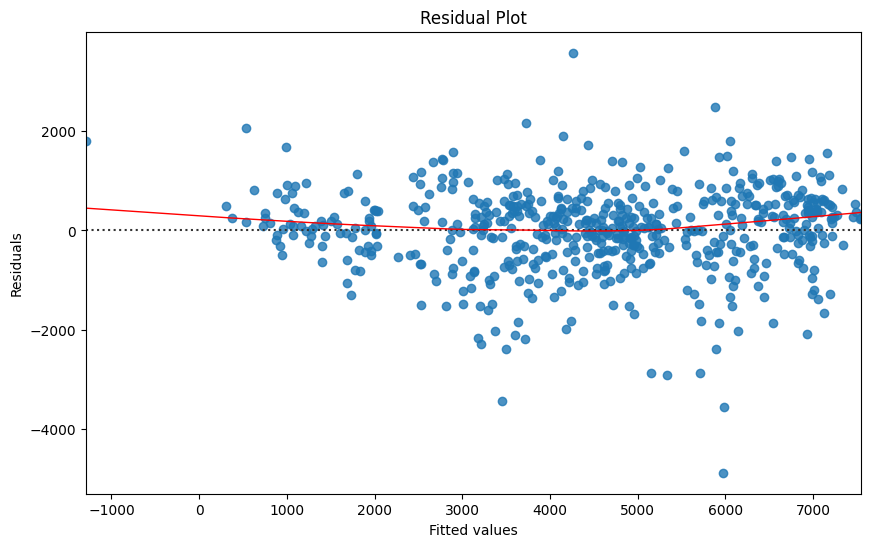

In [33]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The plot indicates a possible violation of the linearity assumption due to the slight curvature observed in the residuals

In [34]:
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 1.9898899869875375


The statistic is very close to 2, which suggests that there is no significant autocorrelation in the residuals

In [35]:
# Add a constant to the independent variables matrix
x_train_with_const = sm.add_constant(x_train_scaled)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, x_train_with_const)

# Extract test results
bp_test_statistic = bp_test[0]
bp_test_p_value = bp_test[1]

print(f'Breusch-Pagan test statistic: {bp_test_statistic}')
print(f'Breusch-Pagan test p-value: {bp_test_p_value}')

Breusch-Pagan test statistic: 59.2345162726955
Breusch-Pagan test p-value: 4.9254714067825234e-05


Since the p-value is very small, it indicates strong evidence against the null hypothesis, suggesting that there is significant heteroscedasticity in the residuals of the regression model

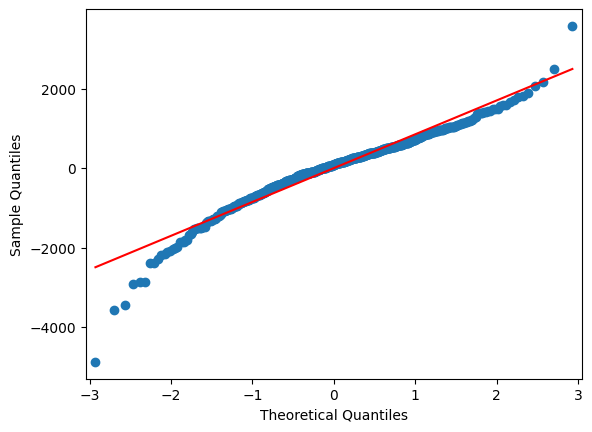

In [36]:
sm.qqplot(residuals, line='s')
plt.show()

The points generally follow a straight line, especially in the middle range of the plot. This suggests that the residuals are approximately normally distributed in this range

There are some noticeable deviations at the tails (both ends) of the plot. The points at the far left and far right deviate from the reference line, indicating that the residuals have heavier tails than a normal distribution. This means that there might be some outliers or extreme values in the residuals

## Predictions

In [37]:
# Making predictions
y_pred_train = model.predict(x_train_scaled)
y_pred_test = model.predict(x_test_scaled)

# Evaluating the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Calculate Adjusted R-squared for train set
n_train = len(y_train)
p_train = x_train_scaled.shape[1]
adjusted_r2_train = 1 - ((1 - train_r2) * (n_train - 1) / (n_train - p_train - 1))

# Calculate Adjusted R-squared for test set
n_test = len(y_test)
p_test = x_test_scaled.shape[1]
adjusted_r2_test = 1 - ((1 - test_r2) * (n_test - 1) / (n_test - p_test - 1))

In [38]:
print(f'Train R-squared: {train_r2}')
print(f'Train Adjusted R-squared: {adjusted_r2_train}')
print(f'Test R-squared: {test_r2}')
print(f'Test Adjusted R-squared: {adjusted_r2_test}')

Train R-squared: 0.8098335556092287
Train Adjusted R-squared: 0.8020231480717506
Test R-squared: 0.8360799624571897
Test Adjusted R-squared: 0.8051770045597747


## Finding top variables

In [39]:
# Get the coefficients
coefficients = pd.Series(model.coef_, index=x_train_scaled.columns)

# Calculate the p-values (requires statsmodels)
x_train_const = sm.add_constant(x_train_scaled)
model_ols = sm.OLS(y_train, x_train_const).fit()
p_values = model_ols.pvalues[1:]  # Exclude intercept

# Combine coefficients and p-values into a DataFrame
coeff_summary = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

# Filter out predictors with non-significant p-values (e.g., p > 0.05)
significant_predictors = coeff_summary[coeff_summary['P-Value'] < 0.05]

# Get the top 3 predictors by absolute value of their coefficients
top_3_predictors = significant_predictors['Coefficient'].abs().nlargest(3)

top_3_predictors

weathersit_3      2430.666551
yr                2065.368361
mnth_September    2020.926429
Name: Coefficient, dtype: float64